# Feature Selection

### Droppong constant features

In [1]:
import pandas as pd

data = pd.DataFrame({"A":[1,2,4,1,2,4],
                     "B":[4,5,6,7,8,9],
                     "C":[0,0,0,0,0,0],
                     "D":[1,1,1,1,1,1]})
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [3]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold (threshold = 0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [4]:
var_thres.get_support()

array([ True,  True, False, False])

In [5]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [10]:
constant_columns = [column for column in data.columns
                   if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [11]:
for feature in constant_columns:
    print(feature)

C
D


In [12]:
data.drop(constant_columns, axis = 1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


###Lets practise on bigger dataset

In [13]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [14]:
df = pd.read_csv('Santander.csv', nrows = 10000)
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.740,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.090,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.880,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.770,0


In [16]:
df.shape

(10000, 371)

In [17]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [18]:
df.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.74,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.09,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.88,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.77,0
9999,20074,2,40,585.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55804.41,0


In [20]:
X = df.drop(labels = ['TARGET'], axis = 1)
Y = df['TARGET']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(labels = ['TARGET'], axis = 1),
    df['TARGET'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

### applying variance threshold

In [28]:
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

### Finding non constant features

In [30]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
sum (var_thres.get_support())

284

In [32]:
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

86


In [33]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [34]:
X_train.drop(constant_columns, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


# Feature Transformation

In [35]:
df.skew()

ID                          0.004151
var3                      -37.762407
var15                       1.549813
imp_ent_var16_ult1         73.420801
imp_op_var39_comer_ult1     9.248736
                             ...    
saldo_medio_var44_hace3    91.189152
saldo_medio_var44_ult1     42.003392
saldo_medio_var44_ult3     43.801950
var38                      37.220226
TARGET                      4.777071
Length: 371, dtype: float64

<Axes: >

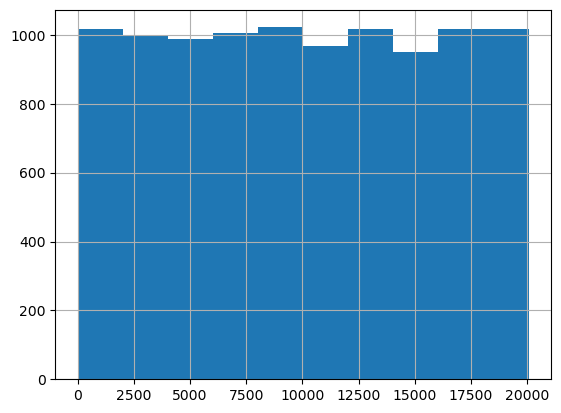

In [36]:
df.ID.hist()

<Axes: >

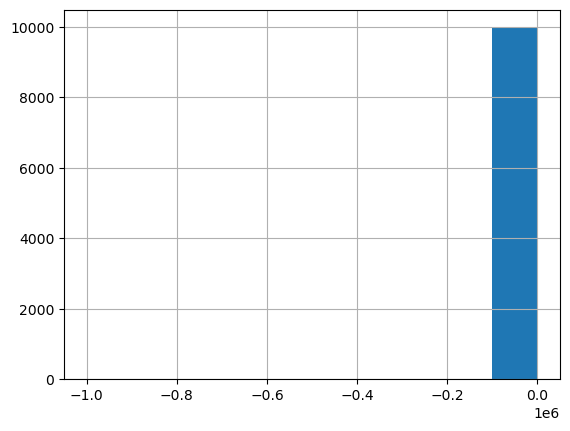

In [37]:
df.var3.hist()

<Axes: >

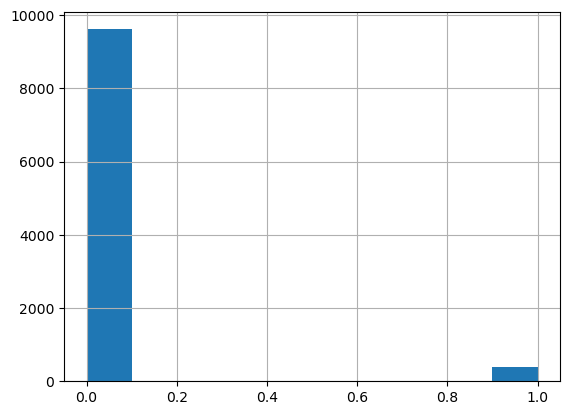

In [38]:
df.TARGET.hist()

In [39]:
import seaborn as sns

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ID', ylabel='Density'>

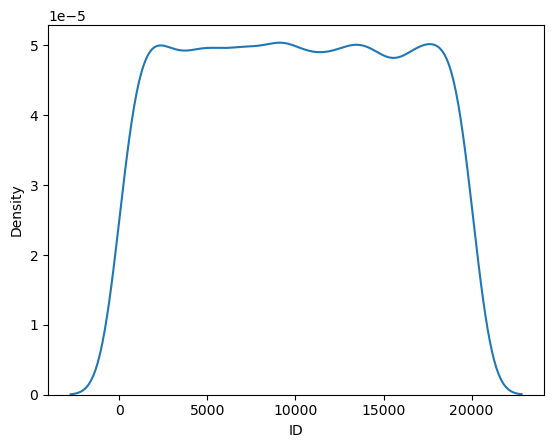

In [40]:
sns.kdeplot(df.ID)

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='var3', ylabel='Density'>

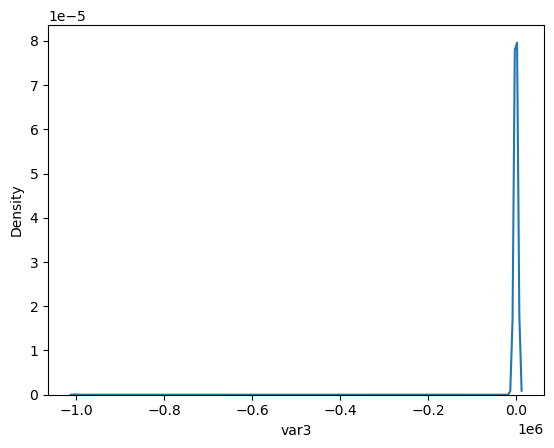

In [41]:
sns.kdeplot(df.var3)

### QQplot, whether the data is normally distributed or not

In [42]:
import scipy.stats as st
import pylab

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([    1,     3,     4, ..., 20071, 20072, 20074], dtype=int64)),
 (5683.237457482875, 10037.371399999998, 0.9770824653523913))

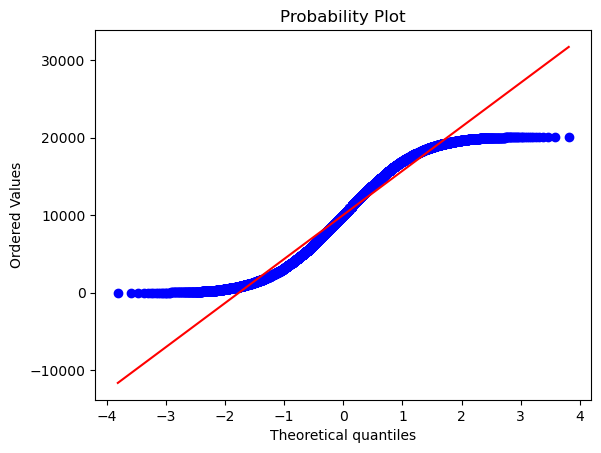

In [44]:
st.probplot(df.ID, plot = pylab)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.08407431964434675, 0.03879999999999998, 0.4351963247445366))

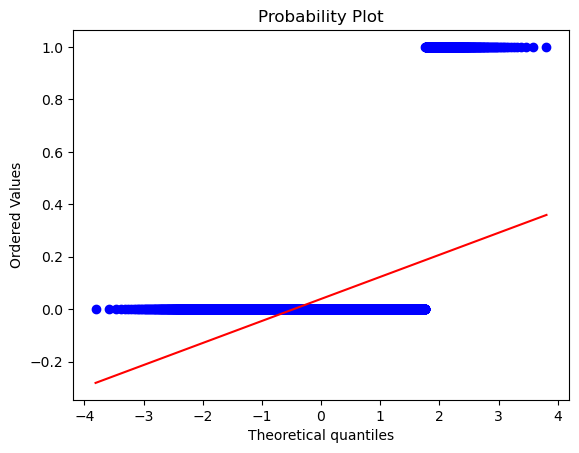

In [45]:
st.probplot(df.TARGET, plot = pylab)

# Assigned Tasks

### Task 1: Feature Selection

In [46]:
import seaborn as sns
import pandas as pd

car_crashes = sns.load_dataset("car_crashes")
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Analyze the correlation between features and the target variable

##### Convert numeric columns stored as strings to numeric otherwise it will give an error, to do so we need to

In [49]:
car_crashes_numeric = car_crashes.apply(pd.to_numeric, errors='coerce')

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

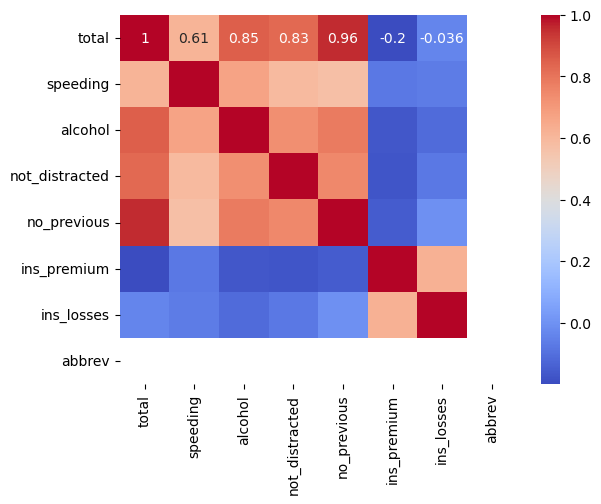

In [52]:
corr_matrix = car_crashes_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

### Use methods like mutual information or chi-squared test to select important features

In [57]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [62]:
car_crashes_numeric = car_crashes.apply(pd.to_numeric, errors='coerce')

##### Drop any columns that are still non-numeric (those that were completely non-numeric)

In [63]:
car_crashes_numeric = car_crashes_numeric.dropna(axis=1, how='all')

#### Drop rows with missing values

In [65]:
car_crashes_numeric = car_crashes_numeric.dropna()
car_crashes_numeric

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18


In [72]:
target_column = 'speeding'
X = car_crashes_numeric.drop(columns=[target_column])
y = car_crashes_numeric[target_column]

In [73]:
mi = mutual_info_regression(X, y)

In [74]:
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False, inplace=True)

In [75]:
mi_series

alcohol           0.449927
total             0.307803
not_distracted    0.219520
no_previous       0.192389
ins_premium       0.106332
ins_losses        0.000000
dtype: float64

### Task 2: Feature Transformation

#### Apply transformations such as log transformation, normalization, or standardization

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Convert to DataFrame for visualization

In [79]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,total,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.737446,0.439938,1.002301,0.277692,-0.580083,0.430514
1,0.565936,-0.211311,0.608532,0.807258,0.943258,-0.022900
2,0.688443,0.187615,0.459357,1.033141,0.070876,-0.981778
3,1.619498,0.547408,1.676052,1.951700,-0.337701,0.321125
4,-0.928653,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
5,-0.536630,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
6,-1.222671,-0.583369,-0.935632,-1.381293,1.029641,1.322702
7,0.100408,-0.015644,0.116657,0.545426,1.421281,0.690769
8,-2.423242,-1.923831,-1.718689,-2.174301,2.191759,0.063310
9,0.516933,0.177686,0.648402,0.756823,1.547371,0.393915


In [80]:
X.describe()

,total,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,10.038000,23.661000,21.280000,1301.520000,194.780000


### Compare the performance of models before and after applying transformations

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#### Split the data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train and evaluate model before scaling

In [83]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)


0.04980033125798389

#### Train and evaluate model after scaling

In [84]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
reg.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = reg.predict(X_test_scaled)
r2_score(y_test_scaled, y_pred_scaled)

0.05088147925773112

### Task 3: Feature Creation

#### Create new features by combining or modifying existing ones

In [85]:
car_crashes['speeding_alcohol_interaction'] = car_crashes['speeding'] * car_crashes['alcohol']

#### Train a model using the original features

In [86]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
reg.fit(X_train_orig, y_train_orig)
y_pred_orig = reg.predict(X_test_orig)
r2_score(y_test_orig, y_pred_orig)

0.04980033125798389

### Task 4: Polynomial Features

#### Generate polynomial features

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#### Convert to DataFrame for better understanding

In [92]:
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

In [93]:
X.shape
X_poly_df.shape

(51, 27)

#### Compare the performance of models with and without polynomial features

In [94]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

#### Train and evaluate model with polynomial features

In [95]:
reg.fit(X_train_poly, y_train_poly)
y_pred_poly = reg.predict(X_test_poly)
r2_score(y_test_poly, y_pred_poly)

0.18387553757202446

### Task 5: Handling Categorical Features

In [96]:
import numpy as np

regions = ['North', 'South', 'East', 'West']
car_crashes['region'] = np.random.choice(regions, size=len(car_crashes))

#### Apply one-hot encoding

In [97]:
from sklearn.preprocessing import OneHotEncoder

car_crashes_encoded = pd.get_dummies(car_crashes, columns=['region'], drop_first=True)
car_crashes_encoded.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,speeding_alcohol_interaction,region_North,region_South,region_West
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,41.352480,True,False,False
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,33.580025,True,False,False
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,33.904080,False,False,True
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,23.482368,False,True,False
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,14.112000,False,True,False


### Compare the performance of models with different encoding methods

In [98]:
X_titanic = car_crashes_encoded.drop(columns=['total'])
y_titanic = car_crashes_encoded['total']

In [99]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)

#### Train and evaluate model with one-hot encoding

In [100]:
reg.fit(X_train_titanic, y_train_titanic)
y_pred_titanic = reg.predict(X_test_titanic)
r2_score(y_test_titanic, y_pred_titanic)

ValueError: could not convert string to float: 'OK'

#### Train and evaluate model with one-hot encoding